# Simulated Annealing Demo

Skrypt przedstawia przykładową implementację algorytmu symulowanego wyżarzania (ang. Simulated Annealing, SA) i jego zastosowanie do rozwiązywania problemu Quadratic Assignment Problem (QAP). Problem jest dokładnie opisany m.in. w pracy Burkarda i innych [1]. Popularne instancje problemu QAP można znaleźć w bibliotece QAPLib [2]. Skrypt skupia się na rozwiązywaniu instancji NUG12 [3], w celu rozwiązywania innych instancji może okazać się konieczna zmiana ustawień parametrów algorytmu.

Literatura:

[1]  Burkard, R., Cela, E., Pardalos, P., Pitsoulis, L., "The Quadratic Assignment Problem", http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.217.1914

[2] QAPLIB, http://anjos.mgi.polymtl.ca/anjos/qaplib/

[3] NUG12, http://anjos.mgi.polymtl.ca/anjos/qaplib/data.d/nug12.dat

#### Popularne instancje QAP wraz z dokładnym minimum funkcji celu
   Nug12   12    578 (OPT)    (12,7,9,3,4,8,11,1,5,6,10,2)                 
   Nug14   14   1014 (OPT)    (9,8,13,2,1,11,7,14,3,4,12,5,6,10)            
   Nug15   15   1150 (OPT)    (1,2,13,8,9,4,3,14,7,11,10,15,6,5,12)          
   Nug16a  16   1610 (OPT)    (9,14,2,15,16,3,10,12,8,11,6,5,7,1,4,13)      
   Nug16b  16   1240 (OPT)    (16,12,13,8,4,2,9,11,15,10,7,3,14,6,1,5)       
   Nug17   17   1732 (OPT)    (16,15,2,14,9,11,8,12,10,3,4,1,7,6,13,17,5)       
   Nug18   18   1930 (OPT)    (10,3,14,2,18,6,7,12,15,4,5,1,11,8,17,13,9,16)     
   Nug20   20   2570 (OPT)    (18,14,10,3,9,4,2,12,11,16,19,15,20,8,13,17,5,7,1,6)
   Nug21   21   2438 (OPT)    (4,21,3,9,13,2,5,14,18,11,16,10,6,15,20,19,8,7,1,12,17) 
   Nug22   22   3596 (OPT)    (2,21,9,10,7,3,1,19,8,20,17,5,13,6,12,16,11,22,18,14,15) 
   Nug24   24   3488 (OPT)    (17,8,11,23,4,20,15,19,22,18,3,14,1,10,7,9,16,21,24,12,6,13,5,2)
   Nug25   25   3744 (OPT)    (5,11,20,15,22,2,25,8,9,1,18,16,3,6,19,24,21,14,7,10,17,12,4,23,13)
*  Nug27   27   5234 (OPT)    (23,18,3,1,27,17,5,12,7,15,4,26,8,19,20,2,24,21,14,10,9,13,22,25,6,16,11)
*  Nug28   28   5166 (OPT)    (18,21,9,1,28,20,11,3,13,12,10,19,14,22,15,2,25,16,4,23,7,17,24,26,5,27,8,6)
*  Nug30   30   6124 (OPT)    (5 12 6 13 2 21 26 24 10 9 29 28 17 1 8 7 19 25 23 22 11 16 30 4 15 18 27 3 14 20)   

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import time
import urllib.request

%matplotlib inline

## Reading input data

In [16]:
def read_data(QAP_INSTANCE_URL, verbose = False):
    qap_instance_file = urllib.request.urlopen(QAP_INSTANCE_URL)

    line = qap_instance_file.readline()
    n = int(line.decode()[:-1].split()[0])
    if verbose:
        print('Problem size: %d' % n)

    A = np.empty((n, n))
    qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        A[i, :] = list(map(int, line.decode()[:-1].split()))
    if verbose:
        print('Flow matrix:\n', A)
    
    B = np.empty((n, n))
    qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        B[i, :] = list(map(int, line.decode()[:-1].split()))
    if verbose:
        print('Distance matrix:\n', B)
    return A,B,n

## Objective function

In [17]:
def qap_objective_function(p):
    s = 0.0
    for i in range(n):
        s += (A[i, :] * B[p[i], p]).sum()
    return s

In [20]:
p = [11, 6, 8, 2, 3, 7, 10, 0, 4, 5, 9, 1]
A,B,n = read_data('http://anjos.mgi.polymtl.ca/anjos/qaplib/data.d/nug12.dat', verbose = True)
print(qap_objective_function(p), p)

Problem size: 12
Flow matrix:
 [[0. 1. 2. 3. 1. 2. 3. 4. 2. 3. 4. 5.]
 [1. 0. 1. 2. 2. 1. 2. 3. 3. 2. 3. 4.]
 [2. 1. 0. 1. 3. 2. 1. 2. 4. 3. 2. 3.]
 [3. 2. 1. 0. 4. 3. 2. 1. 5. 4. 3. 2.]
 [1. 2. 3. 4. 0. 1. 2. 3. 1. 2. 3. 4.]
 [2. 1. 2. 3. 1. 0. 1. 2. 2. 1. 2. 3.]
 [3. 2. 1. 2. 2. 1. 0. 1. 3. 2. 1. 2.]
 [4. 3. 2. 1. 3. 2. 1. 0. 4. 3. 2. 1.]
 [2. 3. 4. 5. 1. 2. 3. 4. 0. 1. 2. 3.]
 [3. 2. 3. 4. 2. 1. 2. 3. 1. 0. 1. 2.]
 [4. 3. 2. 3. 3. 2. 1. 2. 2. 1. 0. 1.]
 [5. 4. 3. 2. 4. 3. 2. 1. 3. 2. 1. 0.]]
Distance matrix:
 [[ 0.  5.  2.  4.  1.  0.  0.  6.  2.  1.  1.  1.]
 [ 5.  0.  3.  0.  2.  2.  2.  0.  4.  5.  0.  0.]
 [ 2.  3.  0.  0.  0.  0.  0.  5.  5.  2.  2.  2.]
 [ 4.  0.  0.  0.  5.  2.  2. 10.  0.  0.  5.  5.]
 [ 1.  2.  0.  5.  0. 10.  0.  0.  0.  5.  1.  1.]
 [ 0.  2.  0.  2. 10.  0.  5.  1.  1.  5.  4.  0.]
 [ 0.  2.  0.  2.  0.  5.  0. 10.  5.  2.  3.  3.]
 [ 6.  0.  5. 10.  0.  1. 10.  0.  0.  0.  5.  0.]
 [ 2.  4.  5.  0.  0.  1.  5.  0.  0.  0. 10. 10.]
 [ 1.  5.  2.  0.  5.  

## Random Sampling

In [28]:
T = 1000000
t0 = time.time()

permutations = np.empty((T, n), dtype=np.int64)
costs = np.zeros(T)
for i in range(T):
    permutations[i, :] = np.random.permutation(n)
    costs[i] = qap_objective_function(permutations[i, :])
        
print(time.time() - t0)

p = permutations[costs.argmin(), :]
    

print(qap_objective_function(p), p)

61.428183794021606
606.0 [ 1  2  8 11  9  0  6  7  4  5 10  3]


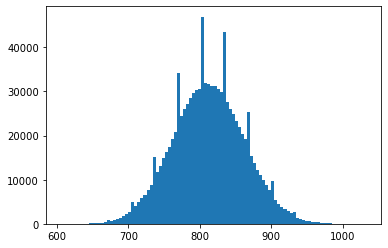

812.073656 49.712661151799786


In [29]:
plt.figure()
plt.hist(costs, bins=100)
plt.show()

print(costs.mean(), costs.std())

## Simulated Annealing

In [30]:
def random_neighbor(p, radius):
    q = p.copy()
    for r in range(radius):
        i, j = np.random.choice(n, 2, replace=False)
        q[i], q[j] = q[j], q[i]
    return q

In [31]:
T = 500000
radius = 1
alpha = 1.0

t0 = time.time()

p = np.random.permutation(n)
p_cost = qap_objective_function(p)
costs = np.zeros(T)
for t in range(T):
    q = random_neighbor(p, radius)
    q_cost = qap_objective_function(q)
    if(q_cost < p_cost):
        p, p_cost = q, q_cost
    elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
        p, p_cost = q, q_cost
    costs[t] = p_cost
    
print(time.time() - t0, costs.min())
    

41.017887592315674 578.0


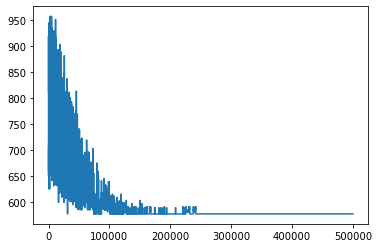

In [32]:
plt.figure()
plt.plot(costs)
plt.show()

# a) NUG 14, 15, 17

(14, 500000, 1, 0.9, 1014) 46.62671637535095 1014.0


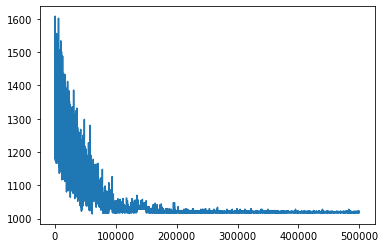

(15, 500000, 1, 0.9, 1150) 52.423885107040405 1150.0


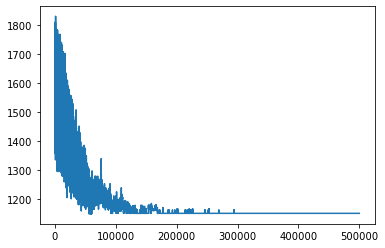

(17, 500000, 1, 0.85, 1732) 56.611106395721436 1736.0


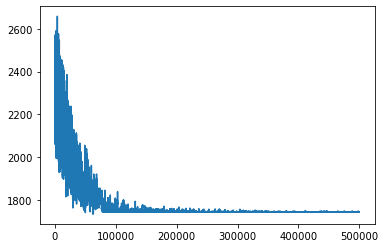

In [55]:
#im mniejsza alpha tym wieksze wahania
#random -> czasem SA utknie przy 14, 17
#?zeby nie utknac w ex lokalnym zwiekszyc radius? (nie oplaca sie zwiekszac chyba radius)
# przy wiekszym radis f szybciej zbiega do jakiegos ekstremum
instances = [(14, 500000, 1, 0.9, 1014), # (14, 500000, 1, 0.8) nie moze sie przykleic
                (15, 500000, 1, 0.9, 1150), #(15, 500000, 4, 0.2, 1150),(15, 800000, 4, 0.5, 1150)1160,(15, 500000, 1, 1.2, 1150),(15, 500000, 2, 0.7, 1150) (15, 500000, 1, 0.9, 1150) 1152, za szybko sie przykleja
                (17, 500000, 1, 0.85, 1732)] # (17, 500000, 2, 0.8) za szybko sie przykleja 1734

for inst in instances:
    
    A, B, n = read_data(f'http://anjos.mgi.polymtl.ca/anjos/qaplib/data.d/nug{inst[0]}.dat')
    T = inst[1]
    radius = inst[2]
    alpha = inst[3]

    t0 = time.time()

    p = np.random.permutation(n)
    p_cost = qap_objective_function(p)
    costs = np.zeros(T)
    for t in range(T):
        q = random_neighbor(p, radius)
        q_cost = qap_objective_function(q)
        if(q_cost < p_cost):
            p, p_cost = q, q_cost
        elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
            p, p_cost = q, q_cost
        costs[t] = p_cost

    print(inst, time.time() - t0, costs.min())
    plt.figure()
    plt.plot(costs)
    plt.show()

# b) NUG 12

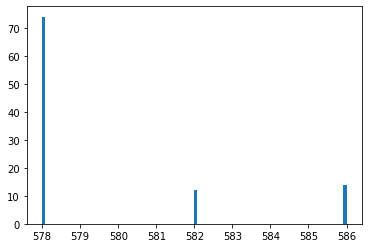

579.6 2.8844410203711917


In [74]:
from tqdm.auto import tqdm

inst = (12, 150000, 1, 0.7, 1014)
num = 100

A, B, n = read_data(f'http://anjos.mgi.polymtl.ca/anjos/qaplib/data.d/nug{inst[0]}.dat')
T = inst[1]
radius = inst[2]
alpha = inst[3]
all_costs = np.zeros(num)

for i in tqdm(range(num)):
    
    t0 = time.time()

    p = np.random.permutation(n)
    p_cost = qap_objective_function(p)
    costs = np.zeros(T)
    
    for t in range(T):
        q = random_neighbor(p, radius)
        q_cost = qap_objective_function(q)
        if(q_cost < p_cost):
            p, p_cost = q, q_cost
        elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
            p, p_cost = q, q_cost
        costs[t] = p_cost

    all_costs[i] = costs.min()

plt.figure()
plt.hist(all_costs, bins=100)
plt.show()

print(all_costs.mean(), all_costs.std())

# c) NUG12

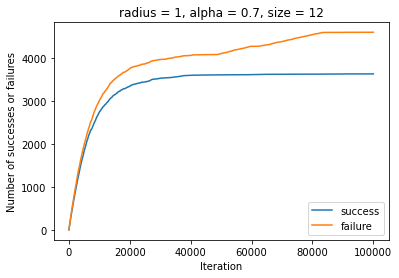

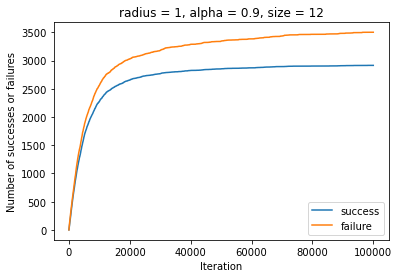

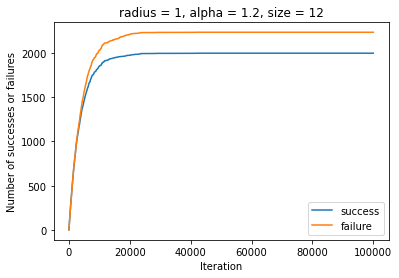

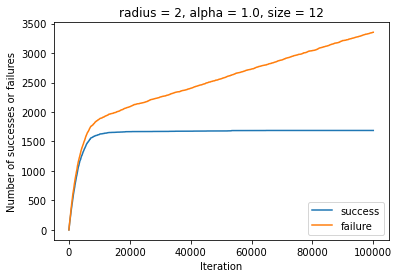

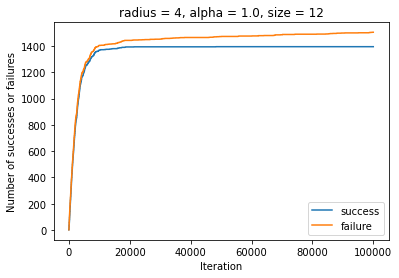

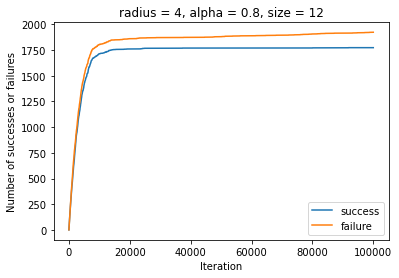

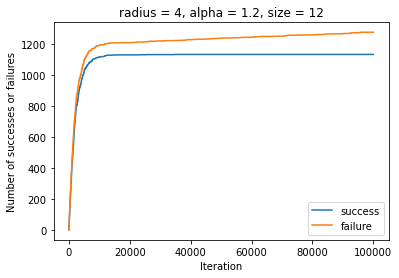

In [66]:
instances = [(1,0.7), (1, 0.9), (1, 1.2), (2, 1.0), (4, 1.0), (4, 0.8), (4, 1.2)]

A, B, n = read_data(f'http://anjos.mgi.polymtl.ca/anjos/qaplib/data.d/nug12.dat')
T = 100000

for inst in instances:
    
    radius = inst[0]
    alpha = inst[1]
    t0 = time.time()
    succs = np.zeros(T)
    fails = np.zeros(T)
    s_count, f_count = 0, 0
    p = np.random.permutation(n)
    p_cost = qap_objective_function(p)
    #costs = np.zeros(T)
    
    for t in range(T):
        q = random_neighbor(p, radius)
        q_cost = qap_objective_function(q)
        if(q_cost < p_cost):
            p, p_cost = q, q_cost
            s_count += 1
        elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
            p, p_cost = q, q_cost
            f_count += 1
        succs[t] = s_count
        fails[t] = f_count
        #costs[t] = p_cost

    plt.figure()
    plt.title(f'radius = {radius}, alpha = {alpha}, size = {n}')
    plt.plot(succs, label = "success")
    plt.ylabel("Number of successes or failures")
    plt.xlabel("Iteration")
    plt.plot(fails, label = "failure")
    plt.legend(loc = "lower right")
    plt.show()

# d) NUG12

155.36186909675598 578.0


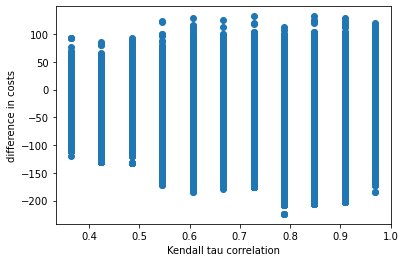

In [83]:
# mierzymy odleglosc miedzy permutacjami jako liczbo transpozycji (NP-trudne)
# L1 Distance czyli moduł z sumowania róznicy kazdego elementu p z q
# liczba zmian, te wszystkie sposoby sie nie sprawdza bo p,q rozni sie tylko na 2 pozycjach

import scipy.stats as sstats # Kendall tau correlation distance 
# (liczba "pasujacych par" - liczba niepasujacych) / (n po 2)
A, B, n = read_data(f'http://anjos.mgi.polymtl.ca/anjos/qaplib/data.d/nug12.dat')
T = 500000
radius = 1
alpha = 1.0

t0 = time.time()

p = np.random.permutation(n)
p_cost = qap_objective_function(p)

costs = np.zeros(T)
dist = np.zeros(T)
diff = np.zeros(T)

for t in range(T):
    q = random_neighbor(p, radius)
    #print(sstats.kendalltau(p,q))
    dist[t] = sstats.kendalltau(p,q)[0]
    q_cost = qap_objective_function(q)
    diff[t] = p_cost - q_cost
    if(q_cost < p_cost):
        p, p_cost = q, q_cost
    elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
        p, p_cost = q, q_cost
    costs[t] = p_cost
    
print(time.time() - t0, costs.min())
plt.figure()

plt.ylabel("difference in costs")
plt.xlabel("Kendall tau correlation")
plt.scatter(dist, diff)
plt.show()

# e) NUG12

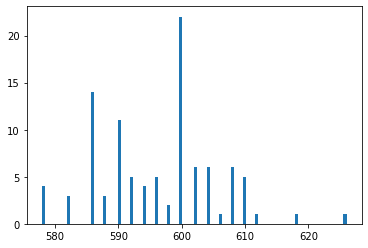

596.24 9.222927951578066
Liczba poprawnych odpowiedzi: 4
Liczba niepoprawnych odpowiedzi: 96


In [112]:
from tqdm.auto import tqdm

inst = (12, 1500, 1, 1.2, 1014)
num = 100

A, B, n = read_data(f'http://anjos.mgi.polymtl.ca/anjos/qaplib/data.d/nug{inst[0]}.dat')
T = inst[1]
radius = inst[2]
alpha = inst[3]
all_costs = np.zeros(num)

for i in tqdm(range(num)):
    
    t0 = time.time()

    p = np.random.permutation(n)
    p_cost = qap_objective_function(p)
    costs = np.zeros(T)
    
    for t in range(T):
        q = random_neighbor(p, radius)
        q_cost = qap_objective_function(q)
        if(q_cost < p_cost):
            p, p_cost = q, q_cost
        elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
            p, p_cost = q, q_cost
        costs[t] = p_cost

    all_costs[i] = costs.min()

plt.figure()
plt.hist(all_costs, bins=100)
plt.show()

print(all_costs.mean(), all_costs.std())
print("Liczba poprawnych odpowiedzi:",len(all_costs[all_costs == 578]))
print("Liczba niepoprawnych odpowiedzi:", len(all_costs[all_costs != 578]))

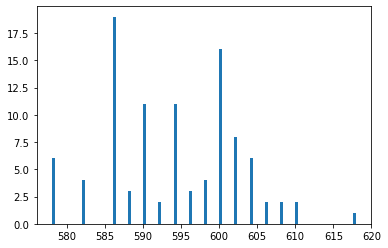

593.88 8.456098391102127
Liczba poprawnych odpowiedzi: 6
Liczba niepoprawnych odpowiedzi: 94


In [119]:
# zmniejszenie wpływu (q_cost - p_cost) umożliwiając większe błądzenie po rozwiązaniach - przy małym T -
# ilości pętli może pozytywnie wpłynąć 
inst = (12, 1500, 1, 1.2, 1014)
num = 100

A, B, n = read_data(f'http://anjos.mgi.polymtl.ca/anjos/qaplib/data.d/nug{inst[0]}.dat')
T = inst[1]
radius = inst[2]
alpha = inst[3]
all_costs = np.zeros(num)

for i in tqdm(range(num)):
    
    t0 = time.time()

    p = np.random.permutation(n)
    p_cost = qap_objective_function(p)
    costs = np.zeros(T)
    
    for t in range(T):
        q = random_neighbor(p, radius)
        q_cost = qap_objective_function(q)
        if(q_cost < p_cost):
            p, p_cost = q, q_cost
        #elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
        elif(np.random.rand() < np.exp(- alpha * np.sqrt(q_cost - p_cost) * t / T)):
            p, p_cost = q, q_cost
        costs[t] = p_cost

    all_costs[i] = costs.min()

plt.figure()
plt.hist(all_costs, bins=100)
plt.show()

print(all_costs.mean(), all_costs.std())
print("Liczba poprawnych odpowiedzi:",len(all_costs[all_costs == 578]))
print("Liczba niepoprawnych odpowiedzi:", len(all_costs[all_costs != 578]))